In [52]:
##Information about Stuff

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(city_data,ride_data,on="city")
# Display the data table for preview
merged_data.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

Text(42, 35, 'Note:\nCircle size correlates with driver count per city.')

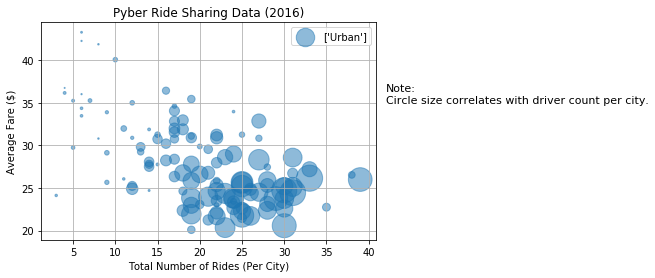

In [187]:
# Obtain the x and y coordinates for each of the three city types
grouped_city = merged_data.groupby("city")
rides = grouped_city["ride_id"].count()
fare = grouped_city["fare"].mean()
types = grouped_city["type"].unique()

# Build the scatter plots for each city types
plt.scatter(rides,fare,alpha=0.5,s=size*.3)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
plt.legend(types)

# Incorporate a text label regarding circle size
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.',fontsize=11)

# Save Figure


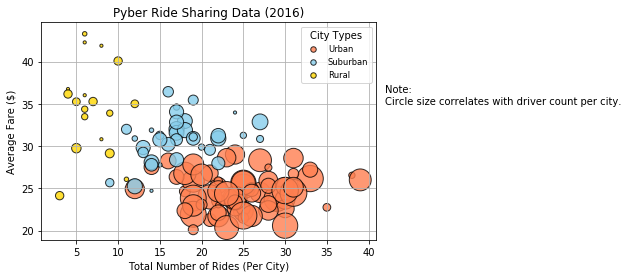

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

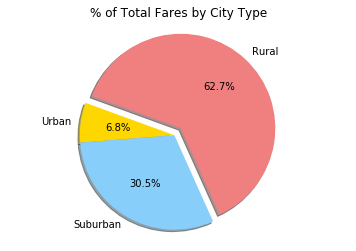

In [241]:
# Calculate Type Percents
type_grouped = merged_data.groupby("type")
total_fares = type_grouped["fare"].sum()

# Build Pie Chart
explode=(0,0,.1)
labels = merged_data["type"].unique()
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_fares,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("data/total_fares_by_city_type.png")

#Show Figure
plt.show()

## Total Rides by City Type

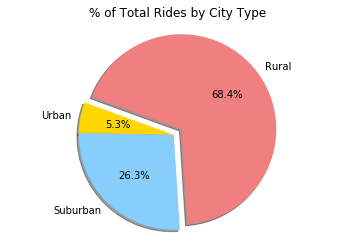

In [304]:
# Calculate Ride Percents
total_rides = type_grouped["ride_id"].count()

# Build Pie Chart
explode=(0,0,.1)
labels = merged_data["type"].unique()
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_rides,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/total_rides_by_city_type.png")

#Show Figure
plt.show()

## Total Drivers by City Type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

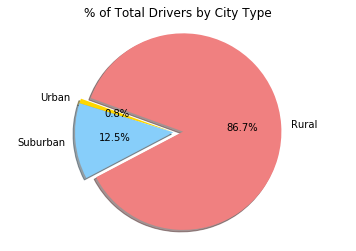

In [343]:
# Calculate Driver Percents
total_drivers = type_grouped["driver_count"].sum()

# Build Pie Charts
explode=(0,0,.1)
labels = merged_data["type"].unique()
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_drivers,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
total_drivers

# Save Figure


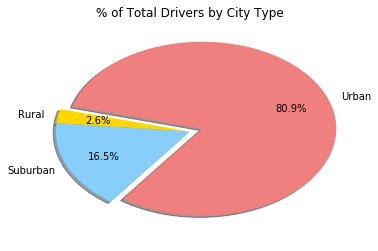

In [6]:
# Show Figure
plt.show()